In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Cell 1 - imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [4]:
# Cell 2B - upload from your computer
from google.colab import files
import io

uploaded = files.upload()  # click 'Choose Files' and select your CSV
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.head()


Saving 1) iris.csv to 1) iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Cell 3 - overview
print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nInfo:")
display(df.info())
print("\nDescriptive stats (numeric):")
display(df.describe().T)
print("\nMissing values per column:")
display(df.isnull().sum().sort_values(ascending=False).head(20))
print("\nNumber of exact duplicate rows:", df.duplicated().sum())


Shape (rows, cols): (150, 5)

Columns:
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5



Missing values per column:


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0



Number of exact duplicate rows: 3


In [6]:
# Cell 4 - missing percentage
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_pct[missing_pct > 0]


,0


In [7]:
# Cell 5 - simple rule-based suggestion
for col, pct in missing_pct.items():
    if pct == 0:
        continue
    elif pct < 10:
        method = "impute (median for numeric, mode for categorical)"
    elif pct < 40:
        method = "consider impute OR domain-specific handling"
    else:
        method = "consider dropping or careful domain-driven imputation"
    print(f"{col:25} {pct:6.2f}% -> {method}")


In [8]:
# Cell 6 - generic imputation for numeric and categorical columns
df_clean = df.copy()  # keep original df if needed

# Numeric columns - fill with median
num_cols = df_clean.select_dtypes(include=['number']).columns
for c in num_cols:
    if df_clean[c].isnull().any():
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

# Categorical/object columns - fill with mode (most frequent)
cat_cols = df_clean.select_dtypes(include=['object','category']).columns
for c in cat_cols:
    if df_clean[c].isnull().any():
        try:
            mode_val = df_clean[c].mode()[0]
            df_clean[c] = df_clean[c].fillna(mode_val)
        except Exception as e:
            # in case column has all NaNs or other issues
            df_clean[c] = df_clean[c].fillna("Unknown")

# Verify
display(df_clean.isnull().sum().sort_values(ascending=False).head(20))


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
# Cell 7 - duplicates removal
print("Duplicates before:", df_clean.duplicated().sum())

# Remove exact duplicate rows
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

print("Duplicates after:", df_clean.duplicated().sum())

# If you want to drop duplicates by a subset of columns:
# df_clean = df_clean.drop_duplicates(subset=['col1','col2']).reset_index(drop=True)


Duplicates before: 3
Duplicates after: 0


In [10]:
# Cell 8 - text cleaning examples
# Example columns: 'name', 'city', 'email', 'gender' — replace with your actual column names

# Strip whitespace and normalize case
for c in df_clean.select_dtypes(include=['object']).columns:
    df_clean[c] = df_clean[c].astype(str).str.strip()

# Example: uniformize gender column values
if 'sex' in df_clean.columns:
    df_clean['sex'] = df_clean['sex'].str.lower().replace({
        'male':'male', 'm':'male', 'female':'female', 'f':'female', 'nan':'unknown'
    })

# Example: remove stray characters from 'fare' if read as string (common in scraped data)
if 'fare' in df_clean.columns and df_clean['fare'].dtype == object:
    df_clean['fare'] = df_clean['fare'].str.replace('[\$,]', '', regex=True).astype(float)

df_clean.head()


<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4190755096.py:16: SyntaxWarning: invalid escape sequence '\$'
  df_clean['fare'] = df_clean['fare'].str.replace('[\$,]', '', regex=True).astype(float)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Cell 9 - date handling example
# Replace 'date_col' with your date column name
date_col = 'date'  # change if your dataset uses another name
if date_col in df_clean.columns:
    df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce', dayfirst=False)

# Example: convert ID column to string (keeps leading zeros)
if 'id' in df_clean.columns:
    df_clean['id'] = df_clean['id'].astype(str)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Numeric columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


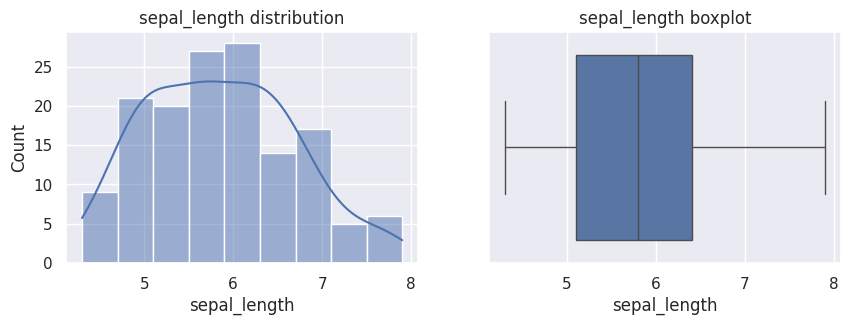

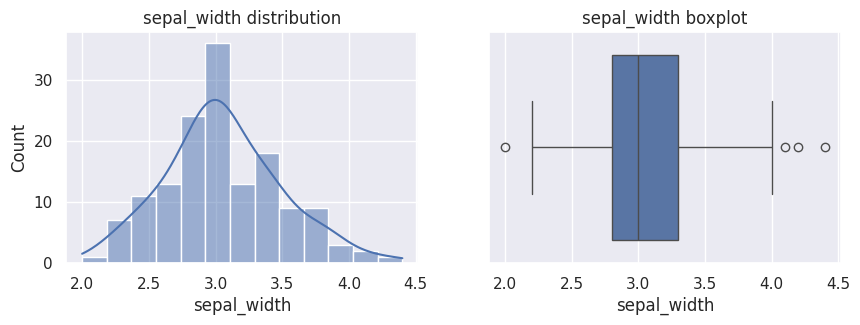

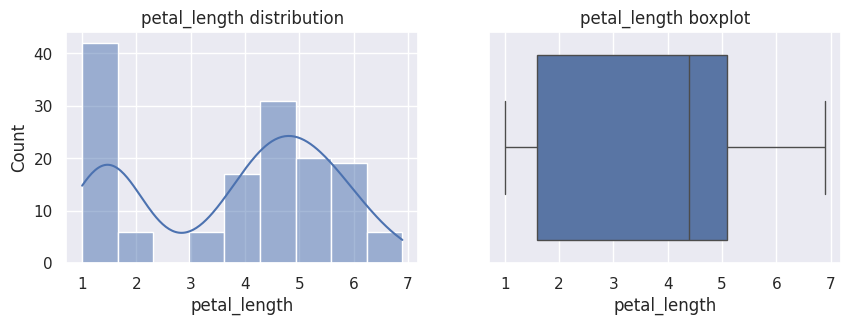

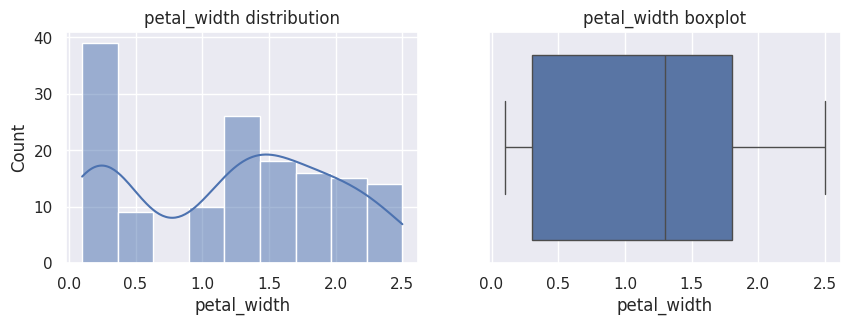

In [13]:
# Cell 10 - quick histograms and boxplots for numeric columns
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", num_cols)

for col in num_cols:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.histplot(df_clean[col].dropna(), kde=True)
    plt.title(f"{col} distribution")
    plt.subplot(1,2,2)
    sns.boxplot(x=df_clean[col].dropna())
    plt.title(f"{col} boxplot")
    plt.show()


In [14]:
# Cell 11 - final quick checks before saving
print("Final shape:", df_clean.shape)
display(df_clean.isnull().sum().sort_values(ascending=False).head(20))
print("Final exact duplicates:", df_clean.duplicated().sum())
display(df_clean.head())


Final shape: (147, 5)


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Final exact duplicates: 0


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
# Cell 12A - save and download locally
cleaned_file = 'cleaned_data.csv'
df_clean.to_csv(cleaned_file, index=False)

from google.colab import files
files.download(cleaned_file)  # browser will download the file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>